In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import time
import warnings



#random forest clasificador
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix, classification_report


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression, Perceptron
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import Birch, DBSCAN
from sklearn.metrics import plot_roc_curve
from sklearn.covariance import EllipticEnvelope
from sklearn.inspection import permutation_importance 
import seaborn as sns
from sklearn.metrics import confusion_matrix

# HR Analytics: Job Change of Data Scientists
[Data & full description](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)

* A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses.
* Information is related to demographics, education, experience are in hands from candidates.
* This dataset designed to understand the factors that lead a person to leave current job for HR researches too.

Se intenta predecir si un conjunto de cientificos de datos que tomaron un curso de entrenamiento van a cambiar o no de trabajo


## Cargamos los datos con Pandas

In [2]:
# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/aug_train.csv',  comment='#')
df = pd.read_csv('./aug_train.csv',  comment='#')
# se elimina los campos que no sirven, y corresponde a la PK de cada registro
df.drop(['enrollee_id'], axis=1, inplace=True) # sin poder de predicción, son codigos id
df.drop(['city'], axis=1, inplace=True) # sin poder de predicción, son codigos id
# se completan los nulos con la palabra "Other"
df.fillna('Other', inplace=True)
# se imprimen cantidad de filas y columnas
####print(df.shape)
# se muestran los primeros 10
df.head(10)


,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Other,Other,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,Other,Other,never,83,0.0
3,0.789,Other,No relevent experience,Other,Graduate,Business Degree,<1,Other,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,0.764,Other,Has relevent experience,Part time course,Graduate,STEM,11,Other,Other,1,24,1.0
6,0.920,Male,Has relevent experience,no_enrollment,High School,Other,5,50-99,Funded Startup,1,24,0.0
7,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,0.920,Other,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


1) Transformar las variables ‘experience’ y ‘last_new_job’ en variables enteras.
Transformar el resto de las variables en dummies.

In [3]:
# se analizan primero los valores en el campo experience
df.groupby('experience').count() 
# 1er paso: con los 522 <1 experience se van a reemplazar por 0
# 2do paso: con los 3286 >20 experience se van a reemplazar por 21
df.experience = df.experience.replace({"<1": 0, ">20": 21})
# 3er paso: con los 65 casos de other se van a eliminar por no identificar en que rango asignarlos y por ser tan solo 64 regitros
indexName = df[df['experience']=='Other'].index
df.drop(indexName,inplace=True)
# 4to paso: cambio el tipo de dato de las columnas a enteras
df['experience']=df['experience'].astype('int')
# reviso los datos post tratamiento
df.groupby('experience').count()




,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job,training_hours,target
experience,,,,,,,,,,,
0,522,522,522,522,522,522,522,522,522,522,522
1,549,549,549,549,549,549,549,549,549,549,549
2,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127
3,1354,1354,1354,1354,1354,1354,1354,1354,1354,1354,1354
4,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403
5,1430,1430,1430,1430,1430,1430,1430,1430,1430,1430,1430
6,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216
7,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028
8,802,802,802,802,802,802,802,802,802,802,802


In [4]:
# se analizan los valores en el campo last_new_job
df.groupby('last_new_job').count() 
# 1er paso: los 2452 que dicen never en el campo last_new_job se van a reemplazar por 0
# 2do paso: Los 3290 que dicen >4 en el campo last_new_job se van a reemplazar por 5
df.last_new_job = df.last_new_job.replace({"never": 0, ">4": 5})
# 3er paso: los 423  que dicen Other en el campo last_new_job se van a eliminar
indexName = df[df['last_new_job']=='Other'].index
df.drop(indexName,inplace=True)
# 4to paso: cambio el tipo de dato de las columnas a enteras
df['last_new_job']=df['last_new_job'].astype('int')
# reviso los datos post tratamiento
df.groupby('last_new_job').count()


,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
last_new_job,,,,,,,,,,,
0,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444
1,8019,8019,8019,8019,8019,8019,8019,8019,8019,8019,8019
2,2897,2897,2897,2897,2897,2897,2897,2897,2897,2897,2897
3,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023
4,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028
5,3283,3283,3283,3283,3283,3283,3283,3283,3283,3283,3283


In [5]:
# se trabajaran los rangos a fin de lograr mejor entendimiento
# 1er paso: con los 1275 registros cuya compañia tiene entre 1 y 9 empleados se reemplazará por el rango 1-9
# 2do paso: con los 1433 registros cuya compañia está dentro de los 10/49 se reemplazara por el rango 10-49
# 3er paso: con los 2534 registros cuya compañia tienen entre 100 y 500 se reemplazara por el rango 100-499
df.company_size = df.company_size.replace({"<10": '1-9',"10/49": '10-49',"100-500": '100-499' })
# se eliminan los nulos identificados como Other
indexName = df[df['company_size']=='Other'].index
df.drop(indexName,inplace=True)
df.groupby('company_size').count() # existen 9 valores posibles

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
company_size,,,,,,,,,,,
1-9,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275
10-49,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433,1433
100-499,2534,2534,2534,2534,2534,2534,2534,2534,2534,2534,2534
1000-4999,1305,1305,1305,1305,1305,1305,1305,1305,1305,1305,1305
10000+,1986,1986,1986,1986,1986,1986,1986,1986,1986,1986,1986
50-99,3030,3030,3030,3030,3030,3030,3030,3030,3030,3030,3030
500-999,862,862,862,862,862,862,862,862,862,862,862
5000-9999,552,552,552,552,552,552,552,552,552,552,552


In [6]:
# inspecciono la estructura del data frame
####print(df.dtypes)
####print(df.shape)
####print(df.info())
####print(df.head(10)) 
# se analizan las variables numericas
df.describe()
# reviso nulos por cada columna del DF
df.isnull().sum()
# reviso los valores de cada columna
df.groupby('gender').count() # existen 3 valores posibles, Male, Famale, Other
df.groupby('relevent_experience').count() # tiene 2 valores posibles: Has relevent experience  y No relevent experience
df.groupby('enrolled_university').count() # tiene 4 valores posibles: Full time course, Other, Part time course, no_enrollment
df.groupby('education_level').count() # existen 6 valores posibles, Graduate, High School, Masters, Other, Phd, Primary School
df.groupby('major_discipline').count() # existen 6 valores posibles, Arts, Business Degree, Humanitie, No Major, Other, STEM 
df.groupby('company_size').count() # existen 6 valores posibles
df.groupby('company_type').count() # existen 6 valores posibles
df.groupby('city_development_index').count() # existen 93 valores posibles



,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
city_development_index,,,,,,,,,,,
0.448,8,8,8,8,8,8,8,8,8,8,8
0.479,9,9,9,9,9,9,9,9,9,9,9
0.487,1,1,1,1,1,1,1,1,1,1,1
0.493,3,3,3,3,3,3,3,3,3,3,3
0.512,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...
0.924,218,218,218,218,218,218,218,218,218,218,218
0.925,122,122,122,122,122,122,122,122,122,122,122
0.926,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017


In [7]:
print(df.dtypes)


city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                  int32
company_size               object
company_type               object
last_new_job                int32
training_hours              int64
target                    float64
dtype: object


In [8]:
# Del df inicial separamos en dos df nuevos: un df con solamente las variables numericas = df_numerico
df_numerico = df.select_dtypes(include =['int32','float64','int64'])
# otro df con solamente las variables objeto para transformarlas en categoricas y luego a dummies = df_categorico 
df_categorico=df.drop('experience',axis=1) # axis=1 significa que es una columna, en 0 una fila
df_categorico=df_categorico.drop('last_new_job',axis=1)
df_categorico=df_categorico.drop('target',axis=1)
df_categorico=df_categorico.drop('training_hours',axis=1)
df_categorico=df_categorico.drop('city_development_index',axis=1)

df_categorico.head(10)




,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type
1,Male,No relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd
4,Male,Has relevent experience,no_enrollment,Masters,STEM,50-99,Funded Startup
6,Male,Has relevent experience,no_enrollment,High School,Other,50-99,Funded Startup
7,Male,Has relevent experience,no_enrollment,Graduate,STEM,1-9,Pvt Ltd
8,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd
9,Other,Has relevent experience,no_enrollment,Graduate,STEM,10000+,Pvt Ltd
11,Male,Has relevent experience,no_enrollment,Graduate,STEM,5000-9999,Pvt Ltd
12,Male,Has relevent experience,no_enrollment,Graduate,STEM,1000-4999,Pvt Ltd
15,Male,Has relevent experience,no_enrollment,Graduate,STEM,10-49,Pvt Ltd
16,Other,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd


In [9]:
# obtengo las variables dummies del categorico
df_categorico = pd.get_dummies(df_categorico.astype(str), drop_first=True) 

# concateno dummies y numercios
df_union = (df_numerico.drop(["target"],axis = 1)).join(df_categorico)


# guardamos la varaible objetivo
target = df_numerico["target"]


In [10]:
print('La cantidad de variables numericas es: ', df_numerico.shape[1])
print('La cantidad de variables categoricas a dummies es: ', df_categorico.shape[1])
print('La union de ambos sin la varaible target es: ', df_union.shape)


La cantidad de variables numericas es:  5
La cantidad de variables categoricas a dummies es:  28
La union de ambos sin la varaible target es:  (12977, 32)


2) Es necesario utilizar EllipticEnvelope para filtrar outliers. Muestre con PCA antes y después de utilizar dicha función y comente los resultados.

In [11]:
# El analisis PCA se realiza sobre el df numerico 
print(df_numerico.dtypes)

city_development_index    float64
experience                  int32
last_new_job                int32
training_hours              int64
target                    float64
dtype: object


In [12]:
# Se elimina la variable objetivo para el analisis PCA
df_PCA = df_numerico.drop(["target"],axis = 1)

# Dividimos el df en conjuntos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(df_PCA, target, test_size=0.1, random_state=0)

# Estandarizamos ambos conjuntos de entrenamiento
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Con 3 componentes sin la elimnación de valores atipicos explicamos tan solo el: 65.79152229235676  % de los datos


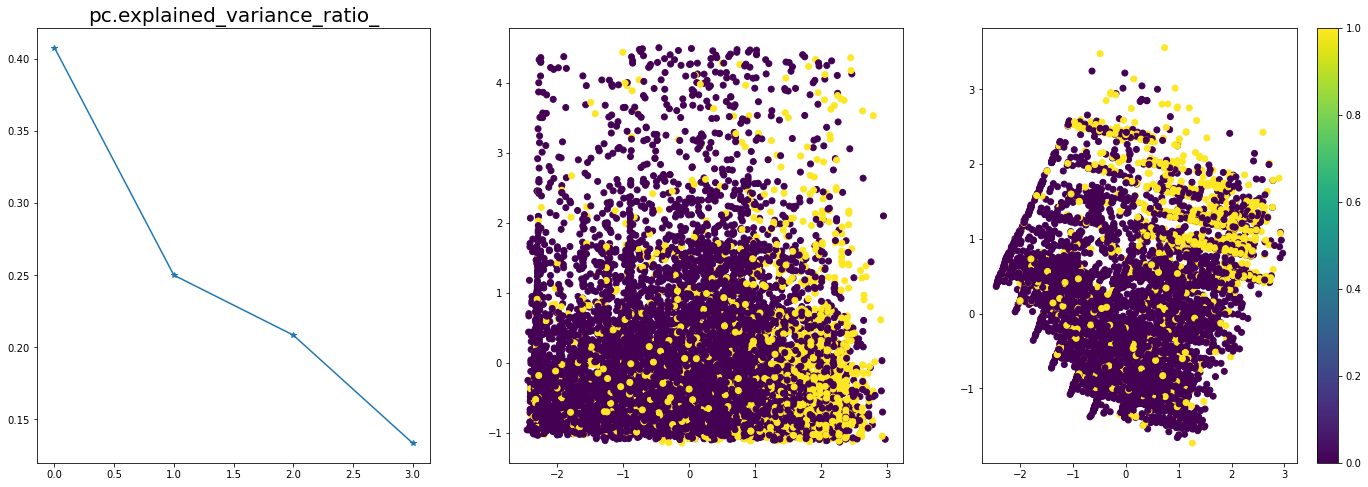

In [13]:
# Realizamos el PCA de datos columnas numericas antes de aplicar EllipticEnvelope
pc = PCA(n_components=None)
X_pc = pc.fit_transform(X_train_std)
exp_var_cumul = np.cumsum(pc.explained_variance_ratio_)

# grafica
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(131)
ax.plot(pc.explained_variance_ratio_, marker='*')
ax.set_title('pc.explained_variance_ratio_', fontsize=20)

ax = fig.add_subplot(132)
ax.scatter(X_pc[:, 0], X_pc[:, 1], c=y_train)


ax = fig.add_subplot(133)
p = ax.scatter(X_pc[:, 0], X_pc[:, 2], c=y_train)
fig.colorbar(p, ax=ax); 

# métrica
print(
    "Con 3 componentes sin la elimnación de valores atipicos explicamos tan solo el:", 
   str(100*round(pc.explained_variance_ratio_.cumsum()[1],30))," % de los datos"
);



In [14]:
df_numerico


,city_development_index,experience,last_new_job,training_hours,target
1,0.776,15,5,47,0.0
4,0.767,21,4,8,0.0
6,0.920,5,1,24,0.0
7,0.762,13,5,18,1.0
8,0.920,7,1,46,1.0
...,...,...,...,...,...
19149,0.920,9,1,36,1.0
19150,0.920,10,3,23,0.0
19152,0.920,7,1,25,0.0
19155,0.920,21,4,44,0.0


In [15]:
# converimos el dataframe a array
arrayData = df_numerico.values
# instanciamos el demolo
modelEllipitic = EllipticEnvelope(contamination = 0.12) 
print(modelEllipitic)
# Ajustamos el modelo con los datos
pred = modelEllipitic.fit_predict(arrayData)

EllipticEnvelope(contamination=0.12)


In [16]:
# Nos quedamos con los valores normales según la elipse
normales_index = np.where(pred==1) #(-1 outliers, 1 inliers)
normales_values = arrayData[normales_index]
dfnormales = pd.DataFrame(normales_values,columns=['city_development_index','experience', 'last_new_job','training_hours','target'])
dfnormales.head()

,city_development_index,experience,last_new_job,training_hours,target
0,0.776,15.0,5.0,47.0,0.0
1,0.767,21.0,4.0,8.0,0.0
2,0.920,5.0,1.0,24.0,0.0
3,0.762,13.0,5.0,18.0,1.0
4,0.920,7.0,1.0,46.0,1.0


Con las primeras 2 componentes explico el 81.0  % de los datos


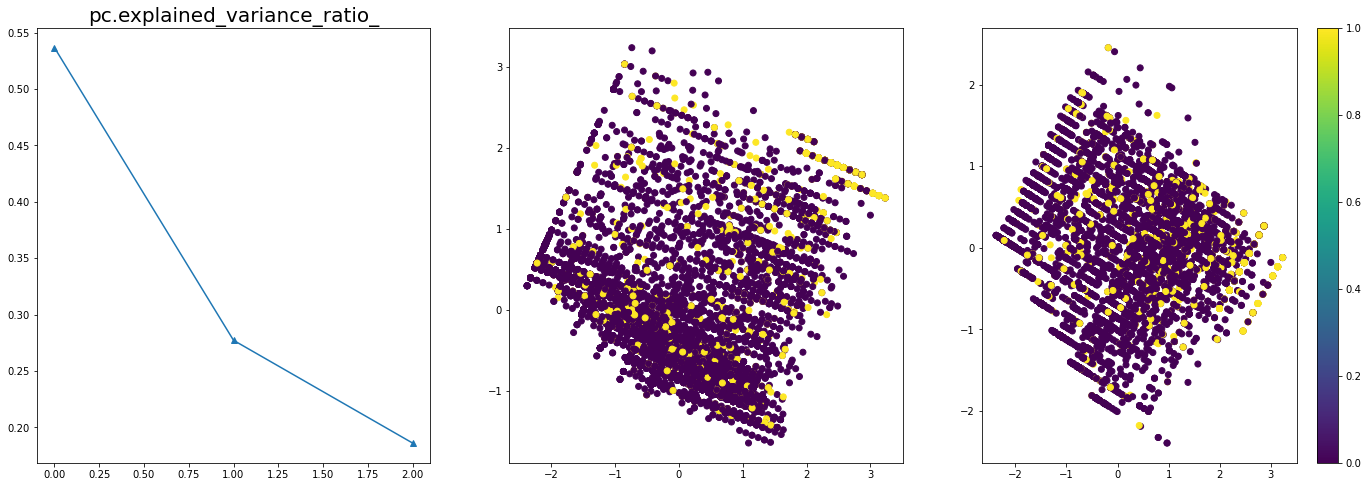

In [17]:
# Reprocesamos y transformamos los datos sin valores atipicos
Xnormales= dfnormales.iloc[:, 0:3].values
ynormales = dfnormales.iloc[:, 4].values


# Separamos en los conjuntos de entrenamiento, testeo y estandarizamos
X_train_normales, X_test_normales, y_train_normales, y_test_normales = train_test_split(Xnormales, ynormales, test_size=0.1, random_state=0)
X_train_normales_std = sc.fit_transform(X_train_normales)
X_test_normales_std = sc.transform(X_test_normales)


# Aplicamos PCA
X_pc = pc.fit_transform(X_train_normales_std)  
exp_var_cumul = np.cumsum(pc.explained_variance_ratio_)


# Grafica
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(131)
ax.plot(pc.explained_variance_ratio_, marker='^')
ax.set_title('pc.explained_variance_ratio_', fontsize=20)

ax = fig.add_subplot(132)
ax.scatter(X_pc[:, 0], X_pc[:, 1], c=y_train_normales ) # c es el color y lo elijo discriminante por la target

ax = fig.add_subplot(133)
p = ax.scatter(X_pc[:, 0], X_pc[:, 2], c=y_train_normales)
fig.colorbar(p, ax=ax);  
 

print(
    "Con las primeras 2 componentes explico el", 
   str(100*round(pc.explained_variance_ratio_.cumsum()[1],2))," % de los datos"
) ;




3) En el ejemplo presentado en ‘Handling Multicollinear Features’ se utiliza clustering jerárquico para analizar el comportamiento de las variables. Adapte el código para mostrar la relación que hay entre las variables del problema de HR. Comente los resultados.

In [18]:
# Utilizmaos el dataframe del paso 1 de nombre df y le quitamos la variable objetivo
X = df.drop(columns=['target'])
y = df['target']

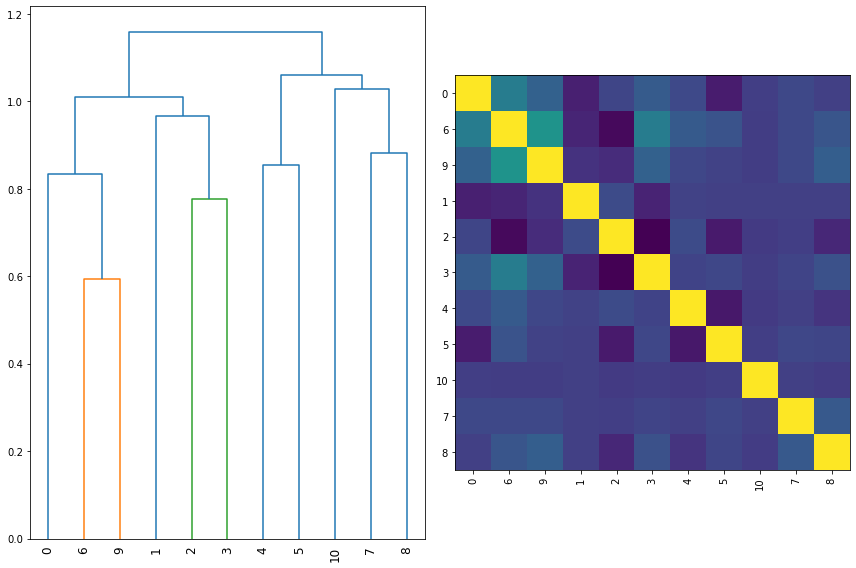

In [19]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X).correlation

# Asegúrese de que la matriz de correlación sea simétrica
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# Convertimos la matriz de correlación en una matriz de distancia antes de realizar
# agrupamiento jerárquico utilizando el enlace de Ward.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram( 
 #dist_linkage, labels = feacture_graficas.feature_names.tolist(), ax=ax1, leaf_rotation=90
 dist_linkage, ax=ax1, leaf_rotation=90
)
    
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()

Conclusion: en el dendograma se ven aprecian 3 conjuntos correlacionado, ejemplo las varialbes de color azul, otro grupo las variables de color verde y otro grupo las de color naranja.
Se detectaron mediante el analisis del dendograma 7 variables altamente correlacionadas (color azul).
Que existan variables correlacionada significa que una variable puede explicar las demas con la que esté correlacionada, lo cual podria elegirse una en representación del grupo correlacionado.



4) Entrenar los modelos: LogisticRegression (L2), RandomForestClassifier, GradientBoostingClassifier y MLPClassifier con GridSearchCV. Luego con el mejor conjunto de parámetros reentrene los clasificadores sobre el conjunto completo de train.

In [20]:
# Armo el dataframe sin los valores atipicos del paso 2 antes de aplicar los modelos
df_array = df_union.values
df_union_sin_atipicos = df_array[normales_index] #dejo las observaciones que no son consideradas outliers
df_union_sin_atipicos = pd.DataFrame(df_union_sin_atipicos, columns=df_union.columns)
df_union_sin_atipicos
df_union_sin_atipicos.describe() #verifico que la cantidad de registros y otras metricas



,city_development_index,experience,last_new_job,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Other,enrolled_university_Part time course,enrolled_university_no_enrollment,...,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
count,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,...,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000,11419.000000
mean,0.868015,11.338821,2.259217,63.548209,0.727559,0.200543,0.152728,0.009195,0.068220,0.808302,...,0.105263,0.152115,0.232507,0.066293,0.043174,0.078553,0.038883,0.064979,0.067607,0.708994
std,0.088807,6.629658,1.657711,59.613724,0.445235,0.400424,0.359741,0.095454,0.252133,0.393654,...,0.306906,0.359148,0.422449,0.248804,0.203257,0.269052,0.193324,0.246500,0.251081,0.454246
min,0.624000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.855000,6.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.913000,10.000000,2.000000,45.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.920000,17.000000,4.000000,85.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.949000,21.000000,5.000000,336.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Armo el dataframe de la variable objetivo considerando solo los valores normales (sin atipicos)
df_array_2 = y.values
df_y_sin_atipicos = df_array_2[normales_index]
df_y_sin_atipicos = pd.DataFrame(df_y_sin_atipicos, columns=['target'])
df_y_sin_atipicos  # objetivo que contiene los valores normales
df_y_sin_atipicos.describe() #verifico que la cantidad de registros que coincide con el df_union_sin_atipicos

,target
count,11419.000000
mean,0.122165
std,0.327490
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [22]:
# Preparo los set de entrenamiento y de testeo con la variables X y la objetivo y creadas en el paso anterior
X_train, X_test, y_train, y_test = train_test_split(df_union_sin_atipicos, df_y_sin_atipicos, stratify=df_y_sin_atipicos, random_state = 12)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# definimos la función que va a tomar como argumentos los valores reales y los predichos para la metrica de que tan especifico es nuestro clasificador
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sp = tn / (tn+fp)
    return(sp)

In [23]:
# Regresion logistica L2:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix,classification_report,recall_score,precision_score,f1_score


logistic_regression = LogisticRegression() # instancio el modelo
#logistic_regression.get_params() # con el metodo inspeccionamos los hiperparametros del modelo
logistic_regression.fit(X_train_scaled, y_train) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = logistic_regression.predict(X_test_scaled) # utilizo el modelo entrenado para predecir
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print(logistic_regression.coef_)
print('Accuracy: ',accuracy_score(y_test, y_test_pred))
print('Recall: ', recall_score(y_test, y_test_pred))  # Definición: Recall mide la capacidad del modelo de detectar los verdaderos positivos (TP) sobre todos los casos que son positivos (TP+FN). Qué tan "sensible" es.
print('Precision: ', precision_score(y_test, y_test_pred)) # Definición: Precision mide qué tan "preciso" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos positivos (TP) sobre todos los casos que son predichos positivos (TP+FP).
print('Specificity: ', specificity(y_test, y_test_pred)) # Definición: specificity mide qué tan "específico" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos negativos (TN) sobre todos los casos que son negativos (TN+FP).
print('F1-Score: ', f1_score(y_test, y_test_pred))  # Definición: F1-Score es la media armónica entre Recall y Precisión. Como regla general, cuanto mayor es esta métrica, mejor es el modelo.


Accuracy:  0.875306479859895
Recall:  0.03724928366762178
Precision:  0.3939393939393939
Specificity:  0.9920191540303273
F1-Score:  0.06806282722513089


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
# Clasificador random forest
        # Conguracion de los hiper parametros:
            # n_estimators: el número de iteraciones (o sea, de base_estimators) para entrenar
            # criterion: define el criterio de impureza para evaluar la calidad de las particiones (por defecto, es gini)
            # max_features: la cantidad de features que extraerá para entrenar cada base_estimator. Por default es igual a sqrt(X.shape[1])
            # bootstrap y bootstrap_features: controla si tanto los n_samples como las features son extraidos con reposición.
            # max_depth: la pronfundidad máxima del árbol
            # min_samples_leaf: el número mínimo de n_samples para constituir una hoja del árbol (nodo terminal)
            # min_samples_split: el número mínimo de n_samples para realizar un split.
random_forest_classifier = RandomForestClassifier(random_state=0)
random_forest_classifier.fit(X_train_scaled, y_train)
y_test_pred = random_forest_classifier.predict(X_test_scaled)
print('Accuracy: ',accuracy_score(y_test, y_test_pred))
print('Recall: ', recall_score(y_test, y_test_pred))  # Definición: Recall mide la capacidad del modelo de detectar los verdaderos positivos (TP) sobre todos los casos que son positivos (TP+FN). Qué tan "sensible" es.
print('Precision: ', precision_score(y_test, y_test_pred)) # Definición: Precision mide qué tan "preciso" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos positivos (TP) sobre todos los casos que son predichos positivos (TP+FP).
print('Specificity: ', specificity(y_test, y_test_pred)) # Definición: specificity mide qué tan "específico" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos negativos (TN) sobre todos los casos que son negativos (TN+FP).
print('F1-Score: ', f1_score(y_test, y_test_pred))  # Definición: F1-Score es la media armónica entre Recall y Precisión. Como regla general, cuanto mayor es esta métrica, mejor es el modelo.



<ipython-input-24-5f8ec60b88a5>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_classifier.fit(X_train_scaled, y_train)


Accuracy:  0.8816112084063047
Recall:  0.17478510028653296
Precision:  0.5495495495495496
Specificity:  0.9800478850758181
F1-Score:  0.26521739130434785


In [25]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42) # instancio el modelo
gradient_boosting_classifier.fit(X_train_scaled, y_train) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = gradient_boosting_classifier.predict(X_test_scaled) # utilizo el modelo entrenado para predecir
print('Accuracy: ',accuracy_score(y_test, y_test_pred))
print('Recall: ', recall_score(y_test, y_test_pred))  # Definición: Recall mide la capacidad del modelo de detectar los verdaderos positivos (TP) sobre todos los casos que son positivos (TP+FN). Qué tan "sensible" es.
print('Precision: ', precision_score(y_test, y_test_pred)) # Definición: Precision mide qué tan "preciso" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos positivos (TP) sobre todos los casos que son predichos positivos (TP+FP).
print('Specificity: ', specificity(y_test, y_test_pred)) # Definición: specificity mide qué tan "específico" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos negativos (TN) sobre todos los casos que son negativos (TN+FP).
print('F1-Score: ', f1_score(y_test, y_test_pred))  # Definición: F1-Score es la media armónica entre Recall y Precisión. Como regla general, cuanto mayor es esta métrica, mejor es el modelo.



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy:  0.887215411558669
Recall:  0.22349570200573066
Precision:  0.6046511627906976
Specificity:  0.9796488427773344
F1-Score:  0.3263598326359833


In [26]:
# MLPClassifier:
from sklearn.neural_network import MLPClassifier
mpl_classifier = MLPClassifier(random_state=1, max_iter=300) # instancio el modelo
mpl_classifier.fit(X_train_scaled, y_train) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = mpl_classifier.predict(X_test_scaled) # utilizo el modelo entrenado para predecir
print('Accuracy: ',accuracy_score(y_test, y_test_pred))
print('Recall: ', recall_score(y_test, y_test_pred))  # Definición: Recall mide la capacidad del modelo de detectar los verdaderos positivos (TP) sobre todos los casos que son positivos (TP+FN). Qué tan "sensible" es.
print('Precision: ', precision_score(y_test, y_test_pred)) # Definición: Precision mide qué tan "preciso" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos positivos (TP) sobre todos los casos que son predichos positivos (TP+FP).
print('Specificity: ', specificity(y_test, y_test_pred)) # Definición: specificity mide qué tan "específico" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos negativos (TN) sobre todos los casos que son negativos (TN+FP).
print('F1-Score: ', f1_score(y_test, y_test_pred))  # Definición: F1-Score es la media armónica entre Recall y Precisión. Como regla general, cuanto mayor es esta métrica, mejor es el modelo.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy:  0.8626970227670753
Recall:  0.16045845272206305
Precision:  0.36129032258064514
Specificity:  0.9604948124501197
F1-Score:  0.22222222222222224


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
# Ahora ejectuamos los modelos utilizando GrideSearchCV

warnings.filterwarnings('ignore')

#a) Regresion logistica L2 con GrideSearchCV

# 1) instanciamos el modelo
logistic_regression = LogisticRegression()
logistic_regression.get_params() # con el metodo inspeccionamos los hiperparametros del modelo

# 2) armamos los parámetros para GridSearchCV
penalizacion = ['l2']
maximo_de_iteraciones = [200,300,400]
algoritmo_de_optimizacion = ['liblinear','saga'] #,'sag','newton-cg']
param_grid = dict(max_iter=maximo_de_iteraciones,penalty=penalizacion,solver=algoritmo_de_optimizacion)
print(param_grid)

# 3) importamos e instanciamos el GridSearchCV
from sklearn.model_selection import GridSearchCV
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)
grid_logistic_regression = GridSearchCV(logistic_regression, param_grid, cv=folds,scoring='accuracy')

# 4) entrenamos el modelo
tic = time.time() 
grid_logistic_regression.fit(X_train_scaled, y_train)
toc= time.time()
print('La busqueda demoró: ', str(toc-tic) + ' Segundos')

# 5) # ¿cuál fue la mejor combinación de hiperparámetros encontrada por GridSearchCV? ¿cuál fue su score de validación?
display(grid_logistic_regression.best_estimator_,grid_logistic_regression.best_score_,grid_logistic_regression.best_params_)


{'max_iter': [200, 300, 400], 'penalty': ['l2'], 'solver': ['liblinear', 'saga']}
La busqueda demoró:  4.483445167541504 Segundos


LogisticRegression(max_iter=200, solver='liblinear')

0.8805469525294715

{'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}

In [28]:
y_preds_log = grid_logistic_regression.predict(X_test_scaled)
print (classification_report(y_test, y_preds_log))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      2506
         1.0       0.39      0.04      0.07       349

    accuracy                           0.88      2855
   macro avg       0.64      0.51      0.50      2855
weighted avg       0.82      0.88      0.83      2855



In [29]:
# LogisticRegression: con lo mejores parametros detectados por GridSearchCV parametrizo el modelo
logistic_regression = LogisticRegression(max_iter=300,penalty='l2',solver='saga') # instancio el modelo
#logistic_regression.get_params() # con el metodo inspeccionamos los hiperparametros del modelo
logistic_regression.fit(X_train_scaled, y_train) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = logistic_regression.predict(X_test_scaled) # utilizo el modelo entrenado para predecir
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print(logistic_regression.coef_)
print('Accuracy: ',accuracy_score(y_test, y_test_pred))
print('Recall: ', recall_score(y_test, y_test_pred))  # Definición: Recall mide la capacidad del modelo de detectar los verdaderos positivos (TP) sobre todos los casos que son positivos (TP+FN). Qué tan "sensible" es.
print('Precision: ', precision_score(y_test, y_test_pred)) # Definición: Precision mide qué tan "preciso" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos positivos (TP) sobre todos los casos que son predichos positivos (TP+FP).
print('Specificity: ', specificity(y_test, y_test_pred)) # Definición: specificity mide qué tan "específico" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos negativos (TN) sobre todos los casos que son negativos (TN+FP).
print('F1-Score: ', f1_score(y_test, y_test_pred))  # Definición: F1-Score es la media armónica entre Recall y Precisión. Como regla general, cuanto mayor es esta métrica, mejor es el modelo.


Accuracy:  0.875306479859895
Recall:  0.03724928366762178
Precision:  0.3939393939393939
Specificity:  0.9920191540303273
F1-Score:  0.06806282722513089


In [30]:
#b) Clasificador random forest con GrideSearchCV

# 1) instanciamos el modelo
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.get_params() # con el metodo inspeccionamos los hiperparametros del modelo

# 2) armamos los parámetros para GridSearchCV
numero_de_arboles=[10,100,150] #n_estimators
criterio=['gini', 'entropy'] #criterion
profundidad_arbol=[5,10,15] #max_depth
numero_caracteristicas= ['auto', 'sqrt', 'log2'] #max_features
param_grid = dict(n_estimators=numero_de_arboles,criterion=criterio,max_depth=profundidad_arbol,max_features=numero_caracteristicas)
print(param_grid)

# 3) importamos e instanciamos el GridSearchCV
from sklearn.model_selection import GridSearchCV
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)
grid_random_forest_classifier = GridSearchCV(random_forest_classifier,param_grid,cv=folds,scoring='accuracy')

tic = time.time() 
# 4) entrenamos el modelo
grid_random_forest_classifier.fit(X_train_scaled, y_train)
toc= time.time()
print('La busqueda demoró: ', str(toc-tic) + ' Segundos')


# 5) # ¿cuál fue la mejor combinación de hiperparámetros encontrada por GridSearchCV? ¿cuál fue su score de validación?
display(grid_random_forest_classifier.best_estimator_,grid_random_forest_classifier.best_score_,grid_random_forest_classifier.best_params_)

{'n_estimators': [10, 100, 150], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15], 'max_features': ['auto', 'sqrt', 'log2']}
La busqueda demoró:  218.9203498363495 Segundos


RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       n_estimators=150)

0.8896559668044363

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'log2',
 'n_estimators': 150}

In [31]:
y_preds_rf = grid_random_forest_classifier.predict(X_test_scaled)
print (classification_report(y_test, y_preds_rf))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      2506
         1.0       0.64      0.20      0.31       349

    accuracy                           0.89      2855
   macro avg       0.77      0.59      0.62      2855
weighted avg       0.87      0.89      0.86      2855



In [32]:
# Clasificador random forest con lo mejores parametros detectados por GridSearchCV parametrizo el modelo
random_forest_classifier = RandomForestClassifier(criterion='gini',max_depth=10,max_features='auto', n_estimators=10)
random_forest_classifier.fit(X_train_scaled, y_train)
y_test_pred = random_forest_classifier.predict(X_test_scaled)
print('Accuracy: ',accuracy_score(y_test, y_test_pred))
print('Recall: ', recall_score(y_test, y_test_pred))  # Definición: Recall mide la capacidad del modelo de detectar los verdaderos positivos (TP) sobre todos los casos que son positivos (TP+FN). Qué tan "sensible" es.
print('Precision: ', precision_score(y_test, y_test_pred)) # Definición: Precision mide qué tan "preciso" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos positivos (TP) sobre todos los casos que son predichos positivos (TP+FP).
print('Specificity: ', specificity(y_test, y_test_pred)) # Definición: specificity mide qué tan "específico" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos negativos (TN) sobre todos los casos que son negativos (TN+FP).
print('F1-Score: ', f1_score(y_test, y_test_pred))  # Definición: F1-Score es la media armónica entre Recall y Precisión. Como regla general, cuanto mayor es esta métrica, mejor es el modelo.


Accuracy:  0.8837127845884414
Recall:  0.14326647564469913
Precision:  0.6024096385542169
Specificity:  0.9868316041500399
F1-Score:  0.23148148148148145


In [33]:
#c) Clasificador GradientBoostingClassifier con GrideSearchCV

# 1) instanciamos el modelo
gradient_boosting_classifier = GradientBoostingClassifier() # instancio el modelo
gradient_boosting_classifier.get_params() # con el metodo inspeccionamos los hiperparametros del modelo

# 2) armamos los parámetros para GridSearchCV
criterio=[ 'squared_error', 'mse'] # 'friedman_mse', 'mae' criterion
profundidad=[5, 10, 15] #max_depth
numero_caracteristicas= ['sqrt', 'log2'] # 'auto', max_features
param_grid = dict(criterion=criterio,max_depth=profundidad,max_features=numero_caracteristicas)
print(param_grid)

# 3) importamos e instanciamos el GridSearchCV
from sklearn.model_selection import GridSearchCV
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)
grid_gradient_boosting_classifier = GridSearchCV(gradient_boosting_classifier,param_grid,cv=folds,scoring='accuracy')

tic = time.time() 
# 4) entrenamos el modelo
grid_gradient_boosting_classifier.fit(X_train_scaled, y_train)
toc= time.time()
print('La busqueda demoró: ', str(toc-tic) + ' Segundos')


# 5) # ¿cuál fue la mejor combinación de hiperparámetros encontrada por GridSearchCV? ¿cuál fue su score de validación?
display(grid_gradient_boosting_classifier.best_estimator_,grid_gradient_boosting_classifier.best_score_,grid_gradient_boosting_classifier.best_params_)

{'criterion': ['squared_error', 'mse'], 'max_depth': [5, 10, 15], 'max_features': ['sqrt', 'log2']}
La busqueda demoró:  223.35729694366455 Segundos


GradientBoostingClassifier(criterion='mse', max_depth=5, max_features='sqrt')

0.8894217766824065

{'criterion': 'mse', 'max_depth': 5, 'max_features': 'sqrt'}

In [293]:
# Clasificador GradientBoostingClassifier  con lo mejores parametros detectados por GridSearchCV parametrizo el modelo
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(criterion='mse',max_depth=5,max_features='sqrt',random_state=42) # instancio el modelo
gradient_boosting_classifier.fit(X_train_scaled, y_train) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = gradient_boosting_classifier.predict(X_test_scaled) # utilizo el modelo entrenado para predecir
print('Accuracy: ',accuracy_score(y_test, y_test_pred))
print('Recall: ', recall_score(y_test, y_test_pred))  # Definición: Recall mide la capacidad del modelo de detectar los verdaderos positivos (TP) sobre todos los casos que son positivos (TP+FN). Qué tan "sensible" es.
print('Precision: ', precision_score(y_test, y_test_pred)) # Definición: Precision mide qué tan "preciso" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos positivos (TP) sobre todos los casos que son predichos positivos (TP+FP).
print('Specificity: ', specificity(y_test, y_test_pred)) # Definición: specificity mide qué tan "específico" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos negativos (TN) sobre todos los casos que son negativos (TN+FP).
print('F1-Score: ', f1_score(y_test, y_test_pred))  # Definición: F1-Score es la media armónica entre Recall y Precisión. Como regla general, cuanto mayor es esta métrica, mejor es el modelo.



Accuracy:  0.8875656742556918
Recall:  0.24068767908309455
Precision:  0.6
Specificity:  0.9776536312849162
F1-Score:  0.34355828220858897


In [146]:
#d) Clasificador MLPClassifier con GrideSearchCV

# 1) instanciamos el modelo
MLP_clasificador = MLPClassifier() # instancio el modelo
MLP_clasificador.get_params() # con el metodo inspeccionamos los hiperparametros del modelo

# 2) armamos los parámetros para GridSearchCV
solucionador=['lbfgs', 'sgd', 'adam'] #solver
tasa_de_aprendizaje=['constant', 'invscaling', 'adaptive'] #learning_rate
iteraciones=[10,15,20] #max_iter
param_grid = dict(solver=solucionador,learning_rate=tasa_de_aprendizaje,max_iter=iteraciones)
print(param_grid)

# 3) importamos e instanciamos el GridSearchCV
from sklearn.model_selection import GridSearchCV
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)
grid_MLP_clasificador = GridSearchCV(MLP_clasificador,param_grid,cv=folds,scoring='accuracy')

tic = time.time() 
# 4) entrenamos el modelo
grid_MLP_clasificador.fit(X_train_scaled, y_train)
toc= time.time()
print('La busqueda demoró: ', str(toc-tic) + ' Segundos')


# 5) # ¿cuál fue la mejor combinación de hiperparámetros encontrada por GridSearchCV? ¿cuál fue su score de validación?
display(grid_MLP_clasificador.best_estimator_,grid_MLP_clasificador.best_score_,grid_MLP_clasificador.best_params_)

{'solver': ['lbfgs', 'sgd', 'adam'], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'max_iter': [10, 15, 20]}
La busqueda demoró:  434.171667098999 Segundos


MLPClassifier(learning_rate='adaptive', max_iter=20)

0.796148359486448

{'learning_rate': 'adaptive', 'max_iter': 20, 'solver': 'adam'}

In [148]:
# Clasificador MLPClassifier  con lo mejores parametros detectados por GridSearchCV parametrizo el modelo
from sklearn.neural_network import MLPClassifier
MLPClassifier = MLPClassifier(solver='adam',learning_rate='adaptive',max_iter=20,random_state=42) # instancio el modelo
MLPClassifier.fit(X_train_scaled, y_train) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = MLPClassifier.predict(X_test_scaled) # utilizo el modelo entrenado para predecir
print('Accuracy: ',accuracy_score(y_test, y_test_pred))
print('Recall: ', recall_score(y_test, y_test_pred))  # Definición: Recall mide la capacidad del modelo de detectar los verdaderos positivos (TP) sobre todos los casos que son positivos (TP+FN). Qué tan "sensible" es.
print('Precision: ', precision_score(y_test, y_test_pred)) # Definición: Precision mide qué tan "preciso" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos positivos (TP) sobre todos los casos que son predichos positivos (TP+FP).
print('Specificity: ', specificity(y_test, y_test_pred)) # Definición: specificity mide qué tan "específico" es el clasificador al predecir las instancias positivas. Se calcula como el número de verdaderos negativos (TN) sobre todos los casos que son negativos (TN+FP).
print('F1-Score: ', f1_score(y_test, y_test_pred))  # Definición: F1-Score es la media armónica entre Recall y Precisión. Como regla general, cuanto mayor es esta métrica, mejor es el modelo.


Accuracy:  0.7832691484809585
Recall:  0.5164930555555556
Precision:  0.566127497621313
Specificity:  0.8705281090289608
F1-Score:  0.5401724920562868


5) Utilice ‘StackingClassifier’ para entrenar un nuevo modelo sobre los datos de train que incluya los modelos previamente entrenados en (4) más un modelos lineal como final_estimator. Los detalles de este método se encuentran en la sección 8.8 del texto ‘The Elements of Statistical Learning’. Para quien esté interesado se incluye una publicación explicando el método.

In [294]:
#pip install mlxtend 

In [297]:
from mlxtend.classifier import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.linear_model import LinearRegression 
clf1 = LogisticRegression(max_iter=300,penalty='l2',solver='saga')
clf2 = RandomForestClassifier(criterion='gini',max_depth=15,max_features='auto', n_estimators=100)
clf3 = GradientBoostingClassifier(criterion='mse',max_depth=5,max_features='sqrt',random_state=42)
clf4 = MLPClassifier(solver='adam',learning_rate='adaptive',max_iter=20,random_state=42)
meta_clasificador = LogisticRegression()
#from sklearn.svm import SVC
#SVC_model = SVC() # meta clasificador
#lr   = LinearRegression() # modelo lineal pedido en el enunciado
sclf = StackingClassifier(classifiers=[clf1,clf2,clf3,clf4],use_probas=True,meta_classifier=meta_clasificador)

print('3-fold cross validation:\n')

for clf,label in zip([clf1,clf2,clf3,clf4,sclf], ['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','MLPClassifier','StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring='f1_macro')
    print("F1 Scores: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))


3-fold cross validation:

F1 Scores: 0.51 (+/- 0.02) [LogisticRegression]
F1 Scores: 0.61 (+/- 0.01) [RandomForestClassifier]
F1 Scores: 0.63 (+/- 0.01) [GradientBoostingClassifier]
F1 Scores: 0.59 (+/- 0.01) [MLPClassifier]
F1 Scores: 0.63 (+/- 0.00) [StackingClassifier]


6) Utilizando ‘plot_roc_curve’ sobre los datos de test muestre el desempeño de los clasificadores. Muestre también sobre los datos de test con outliers.¿Si hay diferencias cuáles podrían ser las razones de estas?

In [43]:
# CON VALORES ATIPICOS
# Division de datos en conjunto de entrenamiento y testeo:
df_target_roc = df_numerico["target"] # preparo el dataframe con la variable objetivo
df_numerico_roc = df_numerico.drop(["target"],axis = 1) # elimino del dataframe la variable objetivo
X_tr, X_te, y_tr, y_te = train_test_split(df_numerico_roc, df_target_roc, test_size=0.1, random_state=0) # separo lo data freme de entrenamiento y testeo
# estandarización:
sc = StandardScaler()
X_tr = sc.fit_transform(X_tr) # standarizamos el dataframe de entrenamiento
X_te = sc.transform(X_te) #standarizamos el dtaframe de test


In [46]:
#LogisticRegression plot_roc_curve con outliers
from sklearn.metrics import roc_curve
logistic_regression = LogisticRegression(max_iter=300,penalty='l2',solver='saga') # instancio el modelo
logistic_regression.fit(X_tr, y_tr) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = logistic_regression.predict(X_te) # utilizo el modelo entrenado para predecir

In [47]:
#RandomForestClassifier plot_roc_curve con outliers
from sklearn.metrics import roc_curve
random_forest_classifier = RandomForestClassifier(criterion='gini',max_depth=15,max_features='auto', n_estimators=100)
random_forest_classifier.fit(X_tr, y_tr)
y_test_pred = random_forest_classifier.predict(X_te)

In [49]:
#GradientBoostingClassifier plot_roc_curve con outliers
from sklearn.metrics import roc_curve
gradient_boosting_classifier = GradientBoostingClassifier(criterion='mse',max_depth=5,max_features='sqrt',random_state=42) # instancio el modelo
gradient_boosting_classifier.fit(X_tr, y_tr) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = gradient_boosting_classifier.predict(X_te) # utilizo el modelo entrenado para predecir

In [51]:
# MLPClassifier plot_roc_curve con outliers
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
MLPClassifier = MLPClassifier(solver='adam',learning_rate='adaptive',max_iter=20,random_state=42) # instancio el modelo
MLPClassifier.fit(X_tr, y_tr) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = MLPClassifier.predict(X_te) # utilizo el modelo entrenado para predecir

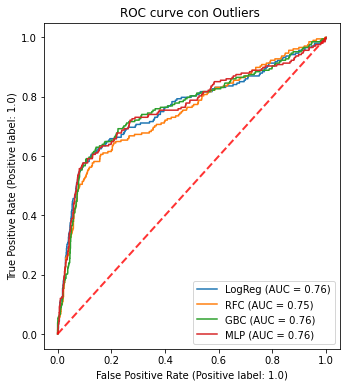

In [52]:
# ROC curve con outliers
fig2= plt.figure(figsize=(18, 6))
ax2 = fig2.add_subplot(1,3,2)
plot_roc_curve(logistic_regression, X_te, y_te, ax=ax2, name='LogReg')
plot_roc_curve(random_forest_classifier, X_te, y_te, ax=ax2, name='RFC')
plot_roc_curve(gradient_boosting_classifier, X_te, y_te, ax=ax2, name='GBC')
plot_roc_curve(MLPClassifier, X_te, y_te, ax=ax2, name='MLP')
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
_ = ax2.set_title('ROC curve con Outliers ');

In [55]:
# SIN VALORES ATIPICOS
# Division de datos en conjunto de entrenamiento y testeo:
# df_union_sin_atipicos es el data frame numerico sin outliers
# df_y_sin_atipicos es el data frame con solamente la variable objetivo sin atipicos, que se corresponde con el anterior
X_tr, X_te, y_tr, y_te = train_test_split(df_union_sin_atipicos, df_y_sin_atipicos, test_size=0.1, random_state=0) # separo lo data freme de entrenamiento y testeo
# estandarización:
sc = StandardScaler()
X_tr = sc.fit_transform(X_tr) # standarizamos el dataframe de entrenamiento
X_te = sc.transform(X_te) #standarizamos el dtaframe de test


In [56]:
#LogisticRegression plot_roc_curve sin outliers
from sklearn.metrics import roc_curve
logistic_regression = LogisticRegression(max_iter=300,penalty='l2',solver='saga') # instancio el modelo
logistic_regression.fit(X_tr, y_tr) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = logistic_regression.predict(X_te) # utilizo el modelo entrenado para predecir

In [57]:
#RandomForestClassifier plot_roc_curve sin outliers
from sklearn.metrics import roc_curve
random_forest_classifier = RandomForestClassifier(criterion='gini',max_depth=15,max_features='auto', n_estimators=100)
random_forest_classifier.fit(X_tr, y_tr)
y_test_pred = random_forest_classifier.predict(X_te)

In [58]:
#GradientBoostingClassifier plot_roc_curve sin outliers
from sklearn.metrics import roc_curve
gradient_boosting_classifier = GradientBoostingClassifier(criterion='mse',max_depth=5,max_features='sqrt',random_state=42) # instancio el modelo
gradient_boosting_classifier.fit(X_tr, y_tr) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = gradient_boosting_classifier.predict(X_te) # utilizo el modelo entrenado para predecir

In [59]:
# MLPClassifier plot_roc_curve sin outliers
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
MLPClassifier = MLPClassifier(solver='adam',learning_rate='adaptive',max_iter=20,random_state=42) # instancio el modelo
MLPClassifier.fit(X_tr, y_tr) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = MLPClassifier.predict(X_te) # utilizo el modelo entrenado para predecir

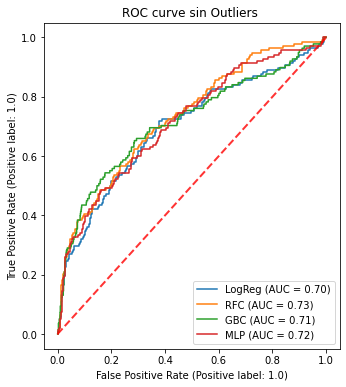

In [60]:
# ROC curve sin outliers
fig2= plt.figure(figsize=(18, 6))
ax2 = fig2.add_subplot(1,3,2)
plot_roc_curve(logistic_regression, X_te, y_te, ax=ax2, name='LogReg')
plot_roc_curve(random_forest_classifier, X_te, y_te, ax=ax2, name='RFC')
plot_roc_curve(gradient_boosting_classifier, X_te, y_te, ax=ax2, name='GBC')
plot_roc_curve(MLPClassifier, X_te, y_te, ax=ax2, name='MLP')
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
_ = ax2.set_title('ROC curve sin Outliers ');

In [ ]:
#SIN OUTLIERS
# ROC curve
fig2= plt.figure(figsize=(18, 6))
ax2 = fig2.add_subplot(1,3,1)
plot_roc_curve(best_model_LogReg, X_test, y_test, ax=ax2, name='LogReg')
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
_ = ax2.set_title('ROC curve sin Outliers ');

#CON OUTLIERS
#tomamos los datasets iniciales 'df_final' y 'df_target'

# PRIMERO DIVIDIMOS LOS DATOS Y ESTANDARIZAMOS:
X_tr, X_te, y_tr, y_te = train_test_split(df_final, df_target, test_size=0.1, random_state=0)

sc = StandardScaler()
X_tr = sc.fit_transform(X_tr)
X_te = sc.transform(X_te)

# ROC curve
ax2 = fig2.add_subplot(1,3,2)
plot_roc_curve(best_model_LogReg, X_te, y_te, ax=ax2, name='LogReg')
plot_roc_curve(best_model_rfc, X_te, y_te, ax=ax2, name='RFC')
plot_roc_curve(best_model_GBC, X_te, y_te, ax=ax2, name='GBC')
plot_roc_curve(best_modelMLP, X_te, y_te, ax=ax2, name='MLP')
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
_ = ax2.set_title('ROC curve con Outliers ');

NameError: name 'df_final' is not defined

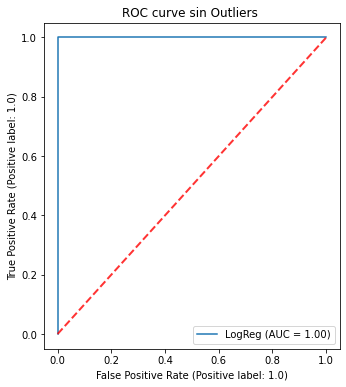

In [316]:
#LogisticRegression plot_roc_curve sin outliers
from sklearn.metrics import roc_curve
logistic_regression = LogisticRegression(max_iter=300,penalty='l2',solver='saga') # instancio el modelo
logistic_regression.fit(X_train_scaled, y_train) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = logistic_regression.predict(X_test_scaled) # utilizo el modelo entrenado para predecir


#SIN OUTLIERS
# ROC curve
fig2= plt.figure(figsize=(18, 6))
ax2 = fig2.add_subplot(1,3,1)
plot_roc_curve(logistic_regression, X_test_scaled, y_test_pred, ax=ax2, name='LogReg')
#plot_roc_curve(best_model_rfc, X_test, y_test, ax=ax2, name='RFC')
#lot_roc_curve(best_model_GBC, X_test, y_test, ax=ax2, name='GBC')
#plot_roc_curve(best_modelMLP, X_test, y_test, ax=ax2, name='MLP')
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
_ = ax2.set_title('ROC curve sin Outliers ');





AUC= 0.5168289514906345


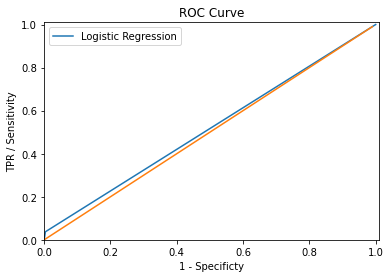

In [304]:
#LogisticRegression plot_roc_curve sin outliers
from sklearn.metrics import roc_curve
logistic_regression = LogisticRegression(max_iter=300,penalty='l2',solver='saga') # instancio el modelo
logistic_regression.fit(X_train_scaled, y_train) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = logistic_regression.predict(X_test_scaled) # utilizo el modelo entrenado para predecir

#característica operativa del receptor (ROC)
fpr_log,tpr_log,thresholds_log = roc_curve(y_test, y_test_pred)# fpr=falsos positivos, tpr=verdaderos positivos, thresholds_log=umbral

from sklearn.metrics import auc
print('AUC=', auc(fpr_log, tpr_log)) #valor del área debajo de la curva

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_log,tpr_log)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['Logistic Regression'])
plt.show() 

#sin outliers X_std_sin_atipicos


AUC= 0.5907095177876821


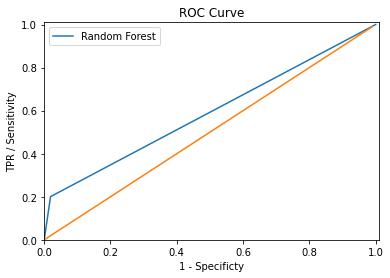

In [301]:
#RandomForestClassifier plot_roc_curve
from sklearn.metrics import roc_curve
random_forest_classifier = RandomForestClassifier(criterion='gini',max_depth=15,max_features='auto', n_estimators=100)
random_forest_classifier.fit(X_train_scaled, y_train)
y_test_pred = random_forest_classifier.predict(X_test_scaled)

fpr_rf,tpr_rf,thr_rf = roc_curve(y_test, y_test_pred)

from sklearn.metrics import auc
print('AUC=', auc(fpr_rf, tpr_rf))


plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_rf,tpr_rf)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['Random Forest'])
plt.show() 

AUC= 0.6091706551840054


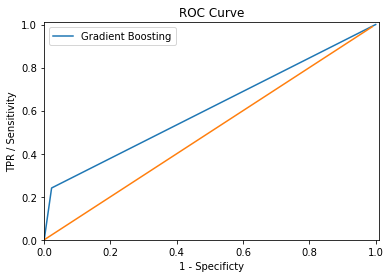

In [302]:
#GradientBoostingClassifier plot_roc_curve
from sklearn.metrics import roc_curve
gradient_boosting_classifier = GradientBoostingClassifier(criterion='mse',max_depth=5,max_features='sqrt',random_state=42) # instancio el modelo
gradient_boosting_classifier.fit(X_train_scaled, y_train) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = gradient_boosting_classifier.predict(X_test_scaled) # utilizo el modelo entrenado para predecir

fpr_gb,tpr_gb,thr_gb = roc_curve(y_test, y_test_pred)
from sklearn.metrics import auc
print('AUC=', auc(fpr_gb, tpr_gb))


plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_gb,tpr_gb)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['Gradient Boosting'])
plt.show() 

AUC= 0.5788131407258682


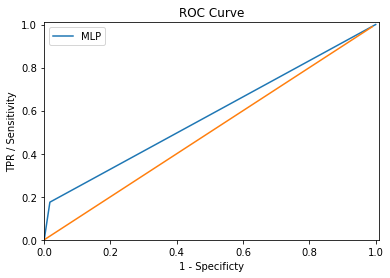

In [303]:
# MLPClassifier plot_roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
MLPClassifier = MLPClassifier(solver='adam',learning_rate='adaptive',max_iter=20,random_state=42) # instancio el modelo
MLPClassifier.fit(X_train_scaled, y_train) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = MLPClassifier.predict(X_test_scaled) # utilizo el modelo entrenado para predecir

fpr_mlp,tpr_mlp,thr_mlp = roc_curve(y_test, y_test_pred)

from sklearn.metrics import auc
print('AUC=', auc(fpr_mlp, tpr_mlp))


plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_mlp,tpr_mlp)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['MLP'])
plt.show() 

7) Repetir (4) y (5) utilizando métodos de regresión, reemplace LogisticRegression (L1) por Ridge. Luego de entrenar, umbralice la respuesta sobre los datos de test, esto es: para valores menores de 0.5 se predice 0 y para valores mayores a 0.5 se predice 1. Es recomendable guardar en una nueva variable esta predicción. Finalmente compare los scores de clasificación de los métodos entrenados en (4) y (5) con los de este punto. Comente sobre los resultados.

In [66]:
#a) Regresion logistica L1 con GrideSearchCV

# 1) instanciamos el modelo
logistic_regression = LogisticRegression()
logistic_regression.get_params() # con el metodo inspeccionamos los hiperparametros del modelo

# 2) armamos los parámetros para GridSearchCV
penalizacion = ['l1']
maximo_de_iteraciones = [200,300,400]
algoritmo_de_optimizacion = ['newton-cg','saga'] #,'sag','newton-cg']
param_grid = dict(max_iter=maximo_de_iteraciones,penalty=penalizacion,solver=algoritmo_de_optimizacion)
print(param_grid)

# 3) importamos e instanciamos el GridSearchCV
from sklearn.model_selection import GridSearchCV
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)
grid_logistic_regression = GridSearchCV(logistic_regression, param_grid, cv=folds,scoring='accuracy')

# 4) entrenamos el modelo
tic = time.time() 
grid_logistic_regression.fit(X_train_scaled, y_train)
toc= time.time()
print('La busqueda demoró: ', str(toc-tic) + ' Segundos')

# 5) ¿cuál fue la mejor combinación de hiperparámetros encontrada por GridSearchCV? ¿cuál fue su score de validación?
display(grid_logistic_regression.best_estimator_,grid_logistic_regression.best_score_,grid_logistic_regression.best_params_)



{'max_iter': [200, 300, 400], 'penalty': ['l1'], 'solver': ['newton-cg', 'saga']}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selectio

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

La busqueda demoró:  349.3574366569519 Segundos


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=200, penalty='l1', solver='saga')

0.7835948644793153

{'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}

In [78]:
# 6) con lo mejores parametros detectados por GridSearchCV en el paso anterior parametrizo el modelo

logistic_regression = LogisticRegression(max_iter=200,penalty='l1',solver='saga') # instancio el modelo
#logistic_regression.get_params() # con el metodo inspeccionamos los hiperparametros del modelo
logistic_regression.fit(X_train_scaled, y_train) # entrenamos el modelo con nuestro conjunto de datos de entrenamiento
y_test_pred = logistic_regression.predict(X_test_scaled) # utilizo el modelo entrenado para predecir

# 7) utlizo predict_proba para obtener las probabilidades y umbralizar

probs = logistic_regression.predict_proba(X_test_scaled) 
probs_1 = probs[:,1]
probs_1
y_pred_2 = probs_1 > 0.9
confusion_matrix(y_test_pred, y_pred_2)
print('Accuracy=', accuracy_score(y_test_pred, y_pred_2))
print('Recall=', recall_score(y_test_pred, y_pred_2))
print('Precision=', precision_score(y_test_pred, y_pred_2))


Accuracy= 0.858793324775353
Recall= 0.0015128593040847202
Precision= 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [79]:
# Pertenencia a partir de las probabilidades
pd.Series(probs[:,1]>0.5).astype(int).value_counts()

0    4013
1     661
dtype: int64

In [80]:
# Pertenencia calculada a partir del método .predict()
pd.Series(y_test_pred).value_counts()

0.0    4013
1.0     661
dtype: int64

In [85]:
pd.Series(probs[:,1]>0.5).astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
4669    0
4670    0
4671    0
4672    0
4673    0
Length: 4674, dtype: int32

In [86]:
y_pred_2

array([False, False, False, ..., False, False, False])

In [87]:
pd.Series(y_pred_2[:,1]>0.5).astype(int)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed